In [1]:
import os
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
dataset = pd.read_csv("./Crop_recommendation.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [4]:
X = dataset.drop('label', axis=1)
Y = dataset['label']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
Y_train shape: (1760,)
Y_test shape: (440,)


In [8]:
KNN_model = KNeighborsClassifier()

In [9]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [10]:
y_pred = KNN_model.predict(X_test)

In [11]:
results = classification_report(Y_test, y_pred)
print(results)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        26
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        18
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        24
        jute       0.80      0.84      0.82        19
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      0.96      0.96        25
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.95      0.98        21
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00        16
      papaya       1.00    

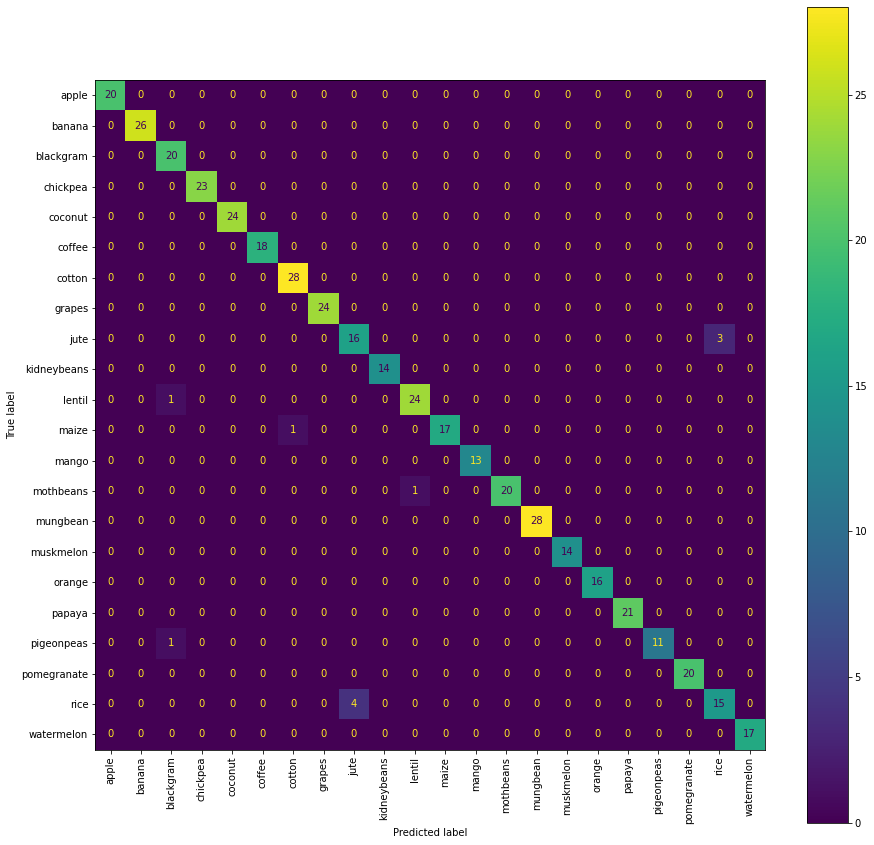

In [13]:
conf_mat = confusion_matrix(Y_test, y_pred, labels=KNN_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=KNN_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical') 

In [15]:
rice_dataset = dataset[dataset["label"] == 'rice']
jute_dataset = dataset[dataset["label"] == 'jute']
dataset_rice_jute = pd.concat([rice_dataset, jute_dataset])

In [16]:
file = open('KNN_model_crop_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(KNN_model, file)